In [1]:
import pandas as pd
import plotly as ply
import numpy as np
import matplotlib.pyplot as plt
from user_defined_function.functions import *
from IPython.display import clear_output
import pickle

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_yaml

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

image_directory= 'image_folder/'
data_directory = 'Original_data/survey_results_public.csv'

Using TensorFlow backend.


In [3]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []        
        self.fig = plt.figure()                
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

### load original data

In [2]:
df = pd.read_csv(data_directory)
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df[Rank2_feature[0]].unique()

array(['Very important', nan, 'Somewhat important', 'Important',
       'Not very important', 'Not at all important'], dtype=object)

In [3]:
### Input column 과 output column에 대해 분석
Rank_feature = ['ProblemSolving','BuildingThings','LearningNewTech','BoringDetails',
                'JobSecurity','DiversityImportant','AnnoyingUI','FriendsDevelopers','RightWrongWay',
                'UnderstandComputers','SeriousWork','InvestTimeTools','WorkPayCare','ChallengeMyself','CompetePeers','ChangeWorld',
               ]
# array(['Strongly agree', nan, 'Agree', 'Somewhat agree', 'Disagree',
#        'Strongly disagree'], dtype=object)
Rank2_feature = ['AssessJobRole','AssessJobRemote','AssessJobProduct','AssessJobProfDevel',
                 'ImportantHiringEducation','ImportantHiringCommunication']
# array(['Very important', nan, 'Somewhat important', 'Important',
#        'Not very important', 'Not at all important'], dtype=object)
Nomial_feature = ['FormalEducation','MajorUndergrad','EducationTypes','ImportantBenefits']
total_input_features = Rank_feature+Rank2_feature+Nomial_feature
Output_feature =  ['Developer type']
Information_feature = ['CousinEducation']
### 인코딩이 필요한 칼럼 
Hot_encoding_needed = ['EducationTypes','CousinEducation','ImportantBenefits']

In [7]:
total_input_features = Rank_feature+Rank2_feature+Nomial_feature
total_input_features

['ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'AssessJobRole',
 'AssessJobRemote',
 'AssessJobProduct',
 'AssessJobProfDevel',
 'ImportantHiringEducation',
 'ImportantHiringCommunication',
 'FormalEducation',
 'MajorUndergrad',
 'EducationTypes',
 'ImportantBenefits']

In [ ]:
EducationTypes_df = Hot_encoding(df,'EducationTypes',dropna = False)
EducationTypes_df.to_csv('Dataframe_folder/EducationTypes_df_HE.csv')
ImportantBenefits_df = Hot_encoding(df,'ImportantBenefits',dropna = False)
ImportantBenefits_df.to_csv('Dataframe_folder/ImportantBenefits_df_HE.csv')
CousinEducation_df = Hot_encoding(df,'CousinEducation',dropna = False)
CousinEducation_df.to_csv('Dataframe_folder/CousinEducation_df_HE.csv')


In [4]:
Output_data = pd.read_csv('Dataframe_folder/DeveloperType_HE.csv',index_col = 0)
Output_data = Output_data[Output_data.sum(axis = 1)==1]
Output_data.sum(axis = 0)

Desktop applications developer                            1433
Embedded applications/devices developer                    664
Mobile developer                                          1556
DevOps specialist                                          192
Web developer                                            10683
Other                                                     1174
Database administrator                                      73
Systems administrator                                       31
Graphic designer                                             6
Developer with a statistics or mathematics background      485
Data scientist                                             249
Graphics programming                                        55
Quality assurance engineer                                 102
Machine learning specialist                                 44
dtype: int64

In [11]:
Output_data = Output_data[['Mobile developer','Web developer','Desktop applications developer']]
Output_data = Output_data[Output_data.sum(axis = 1)==1]
Output_data.shape

(13672, 3)

In [12]:
EducationTypes_df = pd.read_csv('Dataframe_folder/EducationTypes_df_HE.csv',index_col = 0)
ImportantBenefits_df = pd.read_csv('Dataframe_folder/ImportantBenefits_df_HE.csv',index_col = 0)
Dummy_df = dict()
for feature in total_input_features:
    Dummy_df[feature] = pd.get_dummies(df[feature])
Dummy_df['EducationTypes'] = EducationTypes_df
Dummy_df['ImportantBenefits'] = ImportantBenefits_df

In [13]:
for key in Dummy_df.keys():
    Dummy_df[key] = Dummy_df[key].loc[Output_data.index]
with open("dict_object/Dummy_features.pkl",'wb') as f :
    pickle.dump(Dummy_df,f)

In [2]:
with open("dict_object/Dummy_features.pkl", 'rb') as f:
    data = pickle.load(f) 

In [3]:
data.keys()

dict_keys(['ProblemSolving', 'BuildingThings', 'LearningNewTech', 'BoringDetails', 'JobSecurity', 'DiversityImportant', 'AnnoyingUI', 'FriendsDevelopers', 'RightWrongWay', 'UnderstandComputers', 'SeriousWork', 'InvestTimeTools', 'WorkPayCare', 'ChallengeMyself', 'CompetePeers', 'ChangeWorld', 'AssessJobRole', 'AssessJobRemote', 'AssessJobProduct', 'AssessJobProfDevel', 'ImportantHiringEducation', 'ImportantHiringCommunication', 'FormalEducation', 'MajorUndergrad', 'EducationTypes', 'ImportantBenefits'])

In [4]:
data

{'ProblemSolving':        Agree  Disagree  Somewhat agree  Strongly agree  Strongly disagree
 7          0         0               0               0                  0
 11         0         0               0               0                  0
 13         0         0               0               0                  0
 15         0         0               0               1                  0
 16         1         0               0               0                  0
 ...      ...       ...             ...             ...                ...
 51372      0         0               0               0                  0
 51374      1         0               0               0                  0
 51377      0         0               0               0                  0
 51382      0         0               0               1                  0
 51384      0         0               0               1                  0
 
 [13672 rows x 5 columns],
 'BuildingThings':        Agree  Disagree  Somewhat a

In [9]:
data['MajorUndergrad'].columns

Index(['A business discipline', 'A health science', 'A humanities discipline',
       'A natural science', 'A non-computer-focused engineering discipline',
       'A social science',
       'Computer engineering or electrical/electronics engineering',
       'Computer programming or Web development',
       'Computer science or software engineering',
       'Fine arts or performing arts', 'I never declared a major',
       'Information technology, networking, or system administration',
       'Management information systems', 'Mathematics or statistics',
       'Psychology', 'Something else'],
      dtype='object')

In [85]:
dummy_df_list = []
for key in Dummy_df.keys():
    dummy_df_list.append(Dummy_df[key])
Input_data = np.concatenate(dummy_df_list,axis = 1)

In [173]:
np.unique(np.argmax(Output_data.values,axis = 1),return_counts=True)

(array([0, 1, 2], dtype=int64), array([ 1556, 10683,  1433], dtype=int64))

In [174]:
labels = np.argmax(Output_data.values,axis = 1)

In [194]:
np.save("numpy_array_data/Input_data",Input_data)
np.save("numpy_array_data/label_data",labels)

In [175]:
trainX, testX, trainY, testY = train_test_split(Input_data, labels, test_size=0.2, random_state=42)

In [176]:
print("trainX :",trainX.shape)
print("trainX :",trainY.shape)
print("trainX :",testX.shape)
print("trainX :",testY.shape)

trainX : (10937, 161)
trainX : (10937,)
trainX : (2735, 161)
trainX : (2735,)


In [177]:
def getModel(arr):
    model=Sequential()
    for i in range(len(arr)):
        if i!=0 and i!=len(arr)-1:
            if i==1:
                model.add(Dense(arr[i],input_dim=arr[0],kernel_initializer='normal', activation='relu'))
            else:
                model.add(Dense(arr[i],activation='relu'))
    model.add(Dense(arr[-1],kernel_initializer='normal',activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    # catego
    return model
Original_Model=getModel([161,50,3])

W1007 12:02:51.095944  4748 legend.py:1282] No handles with labels found to put in legend.


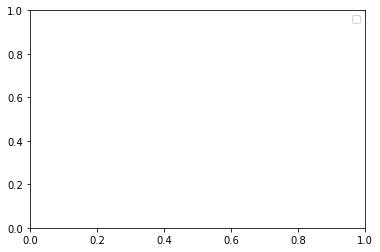

In [181]:
### Artificial neuron network 
firstModel.fit(np.array(trainX),np.array(trainY),epochs=40,callbacks=[plot_losses])

In [216]:
### XGBoost
XGBmodel = XGBClassifier()
XGBmodel.fit(trainX,trainY)
predictions = XGBmodel.predict(testX)

In [228]:
print ("accuracy" , metrics.accuracy_score(testY, predictions))
print(np.unique(testY,return_counts = True)[1][1]/np.sum(np.unique(testY,return_counts = True)[1]))

accuracy 0.7886654478976234
0.7886654478976234


In [227]:
np.unique(predictions,return_counts = True)

(array([1], dtype=int64), array([2735], dtype=int64))

In [225]:
# 0 = 'Mobile'
# 1 = 'Web'
# 2 = 'Desk'
Mobile =0
Web = 0
Desk = 0
np.unique(testY,return_counts = True)[1]
for i in range(predictions.shape[0]) :
    if testY[i] == predictions[i] :
        if testY[i] == 0 :
            Mobile += 1
        elif testY[i] == 1 :
            Web += 1
        else :
            Desk += 1
print("Mobile accuracy :", Mobile/np.unique(testY,return_counts = True)[1][0]*100)
print("Web accuracy :", Web/np.unique(testY,return_counts = True)[1][1]*100)
print("Desk accuracy :", Desk/np.unique(testY,return_counts = True)[1][2]*100)
        

Mobile accuracy : 0.0
Web accuracy : 100.0
Desk accuracy : 0.0


In [183]:
model_yaml = firstModel.to_yaml()
with open("Model_folder/ANN_model_unimbal.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
firstModel.save_weights("Model_folder/model_3_unimbal.h5")

In [184]:
score = firstModel.evaluate(testX, testY, verbose=0)
score

[0.9268285886025298, 0.7378427788587986]

In [190]:
predY= firstModel.predict(testX)
unique_elements, counts_elements = np.unique(np.argmax(predY,axis = 1),return_counts=True)
print("predYunique_elements : ",unique_elements)
print("predY value's count : ",counts_elements)
print("real data value's count : ",np.unique(testY,return_counts = True))

predYunique_elements :  [0 1 2]
predY value's count :  [ 133 2491  111]
real data value's count :  (array([0, 1, 2], dtype=int64), array([ 304, 2157,  274], dtype=int64))


# 데이터가 비정형 데이터 이므로 under sampling, over sampling을 시행.

In [237]:
rus = RandomUnderSampler(random_state=0)
X_Undersample, y_Undersample = rus.fit_resample(Input_data, labels)
print("X_Undersample's shape : ",X_Undersample.shape)
print("y_Undersample's shape : ",y_Undersample.shape)

X_Undersample's shape :  (4299, 161)
y_Undersample's shape :  (4299,)


In [238]:
ros = RandomOverSampler(random_state=0)
X_Oversample, y_Oversample = ros.fit_resample(Input_data,labels)
print("X_Undersample's shape : ",X_Oversample.shape)
print("y_Undersample's shape : ",y_Oversample.shape)

X_Undersample's shape :  (32049, 161)
y_Undersample's shape :  (32049,)


# 먼저 Under sampling data를 이용하여 모델 테스트

In [239]:
UtrainX, UtestX, UtrainY, UtestY = train_test_split(X_Undersample, y_Undersample, test_size=0.2, random_state=42)
print("trainX :",UtrainX.shape)
print("trainX :",UtrainY.shape)
print("trainX :",UtestX.shape)
print("trainX :",UtestY.shape)

trainX : (3439, 161)
trainX : (3439,)
trainX : (860, 161)
trainX : (860,)


In [240]:
### XGBoost
Unbal_XGBmodel = XGBClassifier()
Unbal_XGBmodel.fit(UtrainX,UtrainY)
Unbal_predictions = Unbal_XGBmodel.predict(UtestX)

In [241]:
# 0 = 'Mobile'
# 1 = 'Web'
# 2 = 'Desk'
Mobile =0
Web = 0
Desk = 0
np.unique(UtestY,return_counts = True)[1]
for i in range(Unbal_predictions.shape[0]) :
    if UtestY[i] == Unbal_predictions[i] :
        if UtestY[i] == 0 :
            Mobile += 1
        elif UtestY[i] == 1 :
            Web += 1
        else :
            Desk += 1
print("Mobile accuracy :", Mobile/np.unique(UtestY,return_counts = True)[1][0]*100)
print("Web accuracy :", Web/np.unique(UtestY,return_counts = True)[1][1]*100)
print("Desk accuracy :", Desk/np.unique(UtestY,return_counts = True)[1][2]*100)

Mobile accuracy : 50.641025641025635
Web accuracy : 28.368794326241137
Desk accuracy : 50.37593984962406


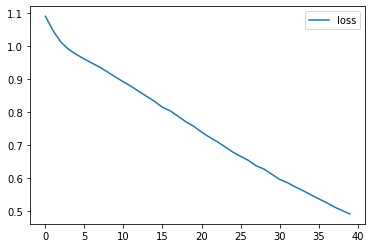

In [242]:
Unbal_Model=getModel([161,50,3])
Unbal_Model.fit(np.array(UtrainX),np.array(UtrainY),epochs=40,callbacks=[plot_losses])

In [243]:
# 생성된 모델 저장
model_yaml = Unbal_Model.to_yaml()
with open("Model_folder/ANN_model_under.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
Unbal_Model.save_weights("Model_folder/model_3_under.h5")

In [244]:
predY= Unbal_Model.predict(testX)
unique_elements, counts_elements = np.unique(np.argmax(predY,axis = 1),return_counts=True)
print("predY unique_elements : ",unique_elements)
print("predY value's count : ",counts_elements)
print("real data value's count : ",np.unique(testY,return_counts=True))

predYunique_elements :  [0 1 2]
predY value's count :  [941 973 821]
real data value's count :  (array([0, 1, 2], dtype=int64), array([ 304, 2157,  274], dtype=int64))


#  Over sampling data를 이용하여 모델 테스트

In [246]:
OtrainX, OtestX, OtrainY, OtestY = train_test_split(X_Oversample, y_Oversample , test_size=0.2, random_state=42)
print("trainX :",OtrainX.shape)
print("trainX :",OtrainY.shape)
print("trainX :",OtestX.shape)
print("trainX :",OtestY.shape)

trainX : (25639, 161)
trainX : (25639,)
trainX : (6410, 161)
trainX : (6410,)


In [272]:
Over_XGBmodel = XGBClassifier()
Over_XGBmodel.fit(OtrainX,OtrainY)
Over_predictions = Over_XGBmodel.predict(testX)

In [275]:
Mobile =0
Web = 0
Desk = 0
testY
for i in range(Over_predictions.shape[0]) :
    if testY[i] ==Over_predictions[i] :
        if testY[i] == 0 :
            Mobile += 1
        elif testY[i] == 1 :
            Web += 1
        else :
            Desk += 1
print("Mobile accuracy :", Mobile/np.unique(testY,return_counts = True)[1][0]*100)
print("Web accuracy :", Web/np.unique(testY,return_counts = True)[1][1]*100)
print("Desk accuracy :", Desk/np.unique(testY,return_counts = True)[1][2]*100)

Mobile accuracy : 60.526315789473685
Web accuracy : 41.02920723226704
Desk accuracy : 64.96350364963503


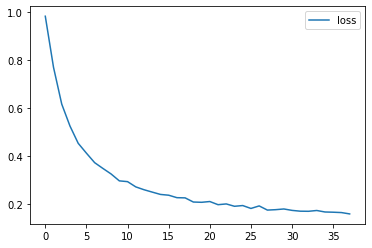

In [281]:
Over_Model=getModel([161,50,50,50,50,50,3])
Over_Model.fit(np.array(OtrainX),np.array(OtrainY),epochs=38,callbacks=[plot_losses])

In [277]:
# 생성된 모델 저장
model_yaml = Over_Model.to_yaml()
with open("Model_folder/ANN_model_over.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
Over_Model.save_weights("Model_folder/model_3_over.h5")

In [282]:
score = Over_Model.evaluate(testX, testY, verbose=0)
score

[0.43700289734702225, 0.8453382084095064]

In [283]:
predY= Over_Model.predict(testX)
unique_elements, counts_elements = np.unique(np.argmax(predY,axis = 1),return_counts=True)
print("predYunique_elements : ",unique_elements)
print("predY value's count : ",counts_elements)
print("real data value's count : ",np.unique(testY,return_counts=True))

predYunique_elements :  [0 1 2]
predY value's count :  [ 554 1777  404]
real data value's count :  (array([0, 1, 2], dtype=int64), array([ 304, 2157,  274], dtype=int64))


In [284]:
print(np.argmax(predY,axis = 1))
print(testY)
Mobile =0
Web = 0
Desk = 0
testY
for i in range(predY.shape[0]) :
    if testY[i] == np.argmax(predY,axis = 1)[i] :
        if testY[i] == 0 :
            Mobile += 1
        elif testY[i] == 1 :
            Web += 1
        else :
            Desk += 1
print("Mobile accuracy :", Mobile/np.unique(testY,return_counts = True)[1][0]*100)
print("Web accuracy :", Web/np.unique(testY,return_counts = True)[1][1]*100)
print("Desk accuracy :", Desk/np.unique(testY,return_counts = True)[1][2]*100)

[1 1 1 ... 0 1 2]
[1 1 1 ... 0 1 2]
Mobile accuracy : 96.71052631578947
Web accuracy : 81.8266110338433
Desk accuracy : 92.33576642335767


In [57]:
# Load 하는 방법
yaml_file = open("Model_folder/ANN_model.yaml", 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("Model_folder/model.h5")
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier

In [ ]:
class create_classification_df(x,y,models = ['SVM','NB','XGboost','KNeighbors','Logistic','SGD']
                             , performance = ['f1-score','recall','Accuracy','precise'], binomial = False) :
    
    def __init__(self, x,y,models = ['SVM','NB','XGboost','KNeighbors','Logistic','SGD']
                             , performance = ['f1-score','recall','Accuracy','precise'], binomial = False)):
        self.x = x
        self.y = y
        self.models = models
        self.performance = performance 
        self.binomial = binomial
        self.Set_xgboost_parameter()
    def Set_xgboost_parameter(self,objective = 'multi:softprob',eta = 0.1,max_depth = 5, num_class = 3, subsample = 0.8,
                             colsample_bytree = 0.8, eval_metric = 'mlogloss',min_child_weight= 10,reg_alpha = 1.5,
                             reg_lambda = 5, scale_pos_weight = 1, n_thread = -1) :
        if 'XGboost' in self.models :
            self.params = {'objective': objective,
                      'learning_rate':eta,
                      'max_depth': max_depth,
                      'num_class': num_class,
                      'subsample': subsample,
                      'colsample_bytree': colsample_bytree,
                      'eval_metric': eval_metric,
                      'min_child_weight': min_child_weight,
                      'reg_alpha': reg_alpha, 
                      'reg_lambda' : reg_lambda,
                      'scale_pos_weight' : scale_pos_weight,          
                      'n_thread':n_thread }
        else:
            print("no xgboost here")
  
    def construct_model(self) :
        model_dict = dict()
        if binomial == True:
            performance.append('AUC-ROC')
        for model in models :
            if model == 'SVM':
                model_dict[model] = SVC(kernel = 'rbf',random_state = 10)
            elif model == 'NB' :
                model_dict[model] = MultinomialNB()
            elif model == 'XGboost' :
                model_dict[model] = xgb.train(self.params,dtrain,n_rounds,early_stopping_rounds=early_stop,verbose_eval=10)

kf =StratifiedKFold(n_splits=5)
for train_index,test_index in kf.split(Input_data): 
    xtr,xvl = Input_data[train_index], Input_data[test_index]
    ytr,yvl = Output_data[train_index], Output_data[test_index]
    
    mNB.fit(xtr,ytr)
    y_mNB = mNB.predict(xvl)
    cv_score.append(log_loss(yvl,mNB.predict_proba(xvl)))    
    pred_test_full += mNB.predict_proba(X_test_cv)